<center>
<h4>Diplomatura en CDAAyA 2020 - FaMAF - UNC</h4>
<h1>¿Caro o Barato? Análisis de Precios de Almacen en un Contexto Inflacionario</h1>
<h3>Introducción al Aprendizaje Automático & Aprendizaje Automático Supervisado</h3>
</center>
</left>
<h4>Sofía Luján y Julieta Bergamasco</h4>
</left>

## Introducción

En la siguiente notebook se presentará la consigna a seguir para el tercer práctico del proyecto, correspondiente a las materias Introducción al Aprendizaje Automático y Aprendizaje Automático Supervisado. El objetivo consiste en explorar la aplicación de diferentes métodos de aprendizaje supervisado aprendidos en el curso, así como también de métodos de _ensemble learning_, a través de experimentos reproducibles, y evaluando a su vez la conveniencia de uno u otro, así como la selección de diferentes hiperparámetros a partir del cálculo de las métricas pertinentes.

En el caso de nuestro proyecto, podemos plantear diferentes tipos de problemas, como la agrupación de productos, la estimación de un precio o la identificación de precios anómalos. Sin embargo, a los fines de este práctico, nos enfocaremos en la predicción de precios relativos.

Para ello, comenzaremos con las importaciones pertinentes.

## Importaciones

In [109]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import plotly.express as px
import sklearn as skl
from io import StringIO

from sklearn import preprocessing
from sklearn.utils import shuffle #, print_eval
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_curve, auc
from sklearn import ensemble #RandomForestClasifier, VotingClassifier
from sklearn import svm #LinearSVC, SVC
from sklearn import neural_network
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

np.random.seed(0)  # Para mayor determinismo
import joblib

In [2]:
pd.set_option('display.max_columns', 1500)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

## Consigna

### I. Preprocesamiento

A los fines de realizar este práctico, se utilizará el dataset limpio obtenido en la etapa anterior. La división entre train y test será realizada en este mismo práctico.
A continuación se detallan los pasos a seguir para el preprocesamiento de los datos.

#### 1. Obtención del Dataset

Cargar los datasets originales.

#### 2. Aplicar Script de Curación

Inicialmente, con el objetivo de preparar los datos que alimentarán los modelos de aprendizaje automático (ML) propuestos, deberán aplicar el script de curación obtenido en el práctico anterior.
En esta etapa, pueden adicionar los atributos que crean pertinentes a priori o que hayan encontrado interesantes por tener mayor correlación con la variable de interés (precio, precio relativo).

#### 3. Correlación Entre Variables Numéricas

Dado que inicialmente eran pocas las variables numéricas y ahora contamos con un grupo más amplio de estas caracteristicas, se propone obtener la correlación entre todas las variables numéricas. Representarla gráficamente utilizando un mapa de calor (heatmap).
¿Cuáles son las features más correlacionadas con el precio?

#### 4. Multicolinealidad Exacta

Las variables explicativas no deben estar muy correlacionadas entre ellas, ya que la variabilidad de una y otra estarán explicando la misma parte de variabilidad de la variable dependiente. Esto es lo que se conoce como multicolinealidad, lo cual deriva en la imposibilidad de estimar los parámetros cuando la misma es exacta o en estimaciones muy imprecisas cuando la misma es aproximada.
En el caso de encontrar multicolinealidad, responder: ¿Cómo se puede solucionar? ¿Qué decisión tomarían al respecto?

#### 5. Normalización de Atributos

Es posible que sea necesario normalizar las features de nuestro dataset, dado que muchos de los algoritmos de aprendizaje supervisado lo requieren. ¿En qué casos tendrá que implementarse normalización?

Aplicar a los datasets la normalización de atributos que consideren adecuada.

#### 6. Mezca Aleatória y División en Train/Test

Finalmente, están en condiciones de **dividir el dataset en Train y Test**, utilizando para este último conjunto un 20% de los datos disponibles. Previo a esta división, es recomendable que mezclen los datos aleatoriamente.
De este modo, deberán obtener cuatro conjuntos de datos, para cada uno de los datasets: ```X_train```, ```X_test```, ```y_train``` y ```y_test```.

Pensar si hacer de esta forma la división puede afectar la distribución espacial y temporal de los datos.
¿Cuáles pueden ser las consecuencias?


---

A modo de ayuda, **en esta notebook encontrarán una especie de template** que sigue los pasos propuestos y que deberán ir completando.

Recuerden que la ciencia de datos es un **proceso circular, continuo y no lineal**. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.

### II. Aplicación de Modelos de Aprendizaje Supervisado

Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de predicción para el precio relativo, utilizando la librería Scikit-Learn:

1. Linear Support Vector Regression ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR))
2. Stochastic Gradient Descent ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor))
3. Regression Based on k-nearest neighbors ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor))
4. Gaussian Process Regression ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor))
5. Prediction Voting Regressor ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor))

Para cada uno de ellos, se pide responder las siguientes consignas:
- Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?
- Obtener MSE, MAE, RMSE, R Square

De estos tipos de modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

**Elegir el modelo que consideren que mejor aplica a nuestro problema.** Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

#### 1. Descripción de la Hipótesis

¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

#### 2. Selección de Regularizador

 ¿Utilizarán algún regularizador?¿Cuál?

#### 3. Selección de Función de Costo

¿Cuál será la función de costo utilizada?

#### 4. Justificación de las Selecciones

¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

- Utilizar el método *Grid Search*, o de búsqueda exahustiva, con *cross-validation* para profundizar en la búsqueda y selección de hiperparámetros.
- Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
    + MSE, MAE, RMSE, R Square
    + Comparar las métricas obtenidas en cada modelo y obtener conclusiones.

---

Si encuentran cualquier otro modelo que consideren apropiado y deseen aplicar, pueden hacerlo con total libertad.

**Opcional**
- Aplicar PCA para reducción de dimensionalidad (manteniendo *n* componentes principales) y entrenar nuevamente el modelo seleccionado como el más apropiado.

### Entregables

El entregable de este práctico consiste en **esta misma Notebook**, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

Sintetizar las conclusiones en un archivo de texto, como lo vienen haciendo con los anteriores prácticos.

**Fecha de Entrega: 31/08**

# Resolución

## I. Preprocesamiento

### 1. Carga de Datos

Para comenzar, importamos los datos que vamos a utilizar:

In [3]:
#precios_20200412_20200413 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200412_20200413.csv')
#precios_20200419_20200419 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200419_20200419.csv')
#precios_20200426_20200426 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200426_20200426.csv')
#precios_20200502_20200503 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200502_20200503.csv')
#precios_20200518_20200518 = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/precios_20200518_20200518.csv')
#productos = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/productos.csv')
#sucursales = pd.read_csv('https://raw.githubusercontent.com/solujan/mentoria_2020/master/raw_dataset/sucursales.csv')

In [4]:
#precios_20200412_20200413.head()

<div class="alert alert-block alert-info">
El dataset ya está **listo para trabajar!**
</div>

### 2. Aplicar Script de Curación

El siguiente paso implica aplicar el script que resultó del práctico anterior. También pueden adicionar campos calculados en base a otros atributos, según lo consideren pertinente.

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dyvanoff\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Script de curación de datos 
#%run -i precioclaros_ultimo.py

In [7]:
# Archivo con datos curados
file ='./sucursal_producto_precio_v2.pkl'

In [8]:
# Lectura de archivo de datos curado
df = pd.read_pickle(file)

In [9]:
df.shape

(2038895, 287)

In [10]:
df.columns

Index(['precio', 'producto_id', 'sucursal_id', 'fecha', 'marca', 'nombre',
       'presentacion', 'categoria1', 'categoria2', 'categoria3',
       ...
       'Unnamed:_0', 'nom_provincia', 'region', 'dummy_region_centro',
       'dummy_region_cuyo', 'dummy_region_norte_grande',
       'dummy_region_patagonia', 'sucursal_id_2', 'bienNumerico',
       'precioRelativo'],
      dtype='object', length=287)

In [11]:
# Borramos las columnas que ya sabemos que no nos vana servir para implementar los modelos.
df = df.drop(columns=['Unnamed:_0','producto_id','precioXUnidad','sucursal_id','sucursal_id_2','precio','bienNumerico','cantidad','unidad','nuevaUnidad','media','mediana','desvio','q1','q3','IQR','comercioId','banderaId','banderaDescripcion','comercioRazonSocial','provincia','localidad','direccion','lat','lng','sucursalNombre','sucursalTipo','fecha','marca','nombre','presentacion','presentacion_depurada','um_depurada','cantidad_depurada','nombre_depurado','presentacion_en_nombre','factor_homogenea','nom_provincia','region', 'categoria1','categoria2', 'categoria3', 'marcas_frecuentes'], axis=1)

In [12]:
df.shape

(2038895, 244)

**Nota: Solo si estamos entrenando local seleccionamos un subset de datos**

In [13]:
from random import shuffle

In [14]:
# Seleccionamos solo 3000 filas si estamos entrenando en maquinas con pocos recursos o localmente
df = shuffle(df)

In [15]:
df=df.iloc[0:3000]

In [16]:
# Copiamos el dataframe para luego trabajar con PCA sobre el dataframe denominado df_pca
df_pca=df.copy()           

In [17]:
# Mostramos unos ejemplos del dataframe que utilizaremos para entrenar los modelos
df.head(5)

,dummy_um_homogenea_kg,dummy_um_homogenea_lt,dummy_um_homogenea_mt,dummy_um_homogenea_pack,dummy_um_homogenea_un,dummy_vino,dummy_queso,dummy_chocolate,dummy_galletitas,dummy_leche,dummy_dulce,dummy_tinto,dummy_crema,dummy_jabon,dummy_blanco,dummy_polvo,dummy_desodorante,dummy_liquido,dummy_fideos,dummy_pan,dummy_shampoo,dummy_vainilla,dummy_jugo,dummy_pollo,dummy_light,dummy_bandeja,dummy_frutilla,dummy_naranja,dummy_malbec,dummy_limpiador,dummy_acondicionador,dummy_jamon,dummy_agua,dummy_aceite,dummy_limon,dummy_arroz,dummy_cerdo,dummy_tono,dummy_yogur,dummy_doypack,dummy_manzana,dummy_mermelada,dummy_mani,dummy_lata,dummy_sal,dummy_salsa,dummy_alimento,dummy_natural,dummy_extra,dummy_aerosol,dummy_carne,dummy_cabernet,dummy_te,dummy_coloracion,dummy_cerveza,dummy_saquitos,dummy_cremoso,dummy_sabor,dummy_trozado,dummy_tintura,dummy_gel,dummy_mate,dummy_durazno,dummy_novillo,dummy_frasco,dummy_saborizada,dummy_sauvignon,dummy_aceitunas,dummy_tapas,dummy_vacio,dummy_esponja,dummy_dental,dummy_novillito,dummy_gas,dummy_panal,dummy_cocido,dummy_tomate,dummy_cepillo,dummy_chorizo,dummy_barra,dummy_ropa,dummy_huevo,dummy_papas,dummy_premium,dummy_cafe,dummy_perros,dummy_budin,dummy_especial,dummy_gaseosa,dummy_yerba,dummy_helado,dummy_maiz,dummy_repuesto,dummy_pisos,dummy_clasico,dummy_caramelos,dummy_color,dummy_ravioles,dummy_mix,dummy_mini,dummy_miel,dummy_relleno,dummy_verdes,dummy_entero,dummy_detergente,dummy_salvado,dummy_tacc,dummy_empanadas,dummy_frutas,dummy_oliva,dummy_pomelo,dummy_ambiente,dummy_kit,dummy_tocador,dummy_caja,dummy_salame,dummy_aromatizante,dummy_bolsa,dummy_lavanda,dummy_rubio,dummy_rubia,dummy_vinagre,dummy_fragancia,dummy_postre,dummy_fino,dummy_colonia,dummy_fresco,dummy_coco,dummy_doble,dummy_batata,dummy_botella,dummy_fritas,dummy_suavizante,dummy_cereal,dummy_salut,dummy_espinaca,dummy_perfume,dummy_toallitas,dummy_negra,dummy_soja,dummy_port,dummy_brut,dummy_alfajor,dummy_tapa,dummy_papel,dummy_antitranspirante,dummy_verde,dummy_bebible,dummy_ultra,dummy_azucar,dummy_lomo,dummy_original,dummy_estuche,dummy_bife,dummy_negro,dummy_pizza,dummy_espumante,dummy_bano,dummy_licor,dummy_semillas,dummy_mozzarella,dummy_higienico,dummy_ternera,dummy_chips,dummy_claro,dummy_aloe,dummy_sopa,dummy_fresh,dummy_harina,dummy_frutos,dummy_huevos,dummy_tostadas,dummy_suave,dummy_cebolla,dummy_bebe,dummy_corporal,dummy_tipo,dummy_atun,dummy_baby,dummy_avena,dummy_alcohol,dummy_rellenas,dummy_piel,dummy_almendras,dummy_grande,dummy_envasado,dummy_plus,dummy_champagne,dummy_gelatina,dummy_menta,dummy_torta,dummy_anana,dummy_alas,dummy_galletas,dummy_bolsas,dummy_n,dummy_tradicional,dummy_syrah,dummy_blanca,dummy_protector,dummy_feteado,dummy_whisky,dummy_asado,dummy_gatos,dummy_antibacterial,palabras_nombre,total_dummies,otras_palabras,dummy_marca_algabo,dummy_marca_alicante,dummy_marca_arcor,dummy_marca_carrefour,dummy_marca_colgate,dummy_marca_cooperativa,dummy_marca_coto,dummy_marca_dia,dummy_marca_dove,dummy_marca_glade,dummy_marca_great_value,dummy_marca_ilolay,dummy_marca_issue,dummy_marca_jumbo,dummy_marca_knorr,dummy_marca_la_anonima,dummy_marca_la_paulina,dummy_marca_la_serenisima,dummy_marca_loreal,dummy_marca_marolio,dummy_marca_nivea,dummy_marca_otras,dummy_marca_paladini,dummy_marca_pampers,dummy_marca_pantene,dummy_marca_primer_precio,dummy_marca_sancor,dummy_marca_sedal,dummy_marca_ser,dummy_marca_sin_marca,dummy_marca_vea,dummy_region_centro,dummy_region_cuyo,dummy_region_norte_grande,dummy_region_patagonia,precioRelativo
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

### 3. Correlación Entre Variables Numéricas

In [18]:
#Agrandamos la cantidad de filas para trabajar con el dataset
pd.set_option('display.max_row', None)

In [19]:
# Utilizamos pearson para determinar la correlación entre features
c = df.corr('pearson').abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

In [20]:
# Seleccionamos las features que tienen una correlación mayor a 0.5 y menor e igual a 1
so2 = so[(abs(so) > 0.5)&(abs(so) <= 1)]

In [21]:
data_frame_corr = so2.to_frame()

In [22]:
data_frame_corr

0
dummy_agua             dummy_liquido           0.510295
dummy_liquido          dummy_agua              0.510295
dummy_agua             dummy_jabon             0.510295
dummy_jabon            dummy_agua              0.510295
dummy_clasico          dummy_cafe              0.539354
dummy_cafe             dummy_clasico           0.539354
dummy_panal            dummy_um_homogenea_un   0.561310
dummy_marca_pampers    dummy_um_homogenea_un   0.561310
dummy_um_homogenea_un  dummy_marca_pampers     0.561310
                       dummy_panal             0.561310
dummy_doypack          dummy_liquido           0.572483
dummy_liquido          dummy_doypack           0.572483
dummy_jabon            dummy_doypack           0.572483
dummy_doypack          dummy_jabon             0.572483
dummy_mate             dummy_suave             0.573462
dummy_suave            dummy_yerba             0.573462
dummy_yerba            dummy_suave             0.573462
dummy_suave            dummy_mate              0.573462
dummy_color            dummy_n                 0.575416
                       dummy_rubio             0.575416
                       dummy_kit               0.575416
dummy_kit              dummy_color             0.575416
dummy_rubio            dummy_color             0.575416
dummy_n                dummy_color             0.575416
dummy_bebible          dummy_yogur             0.575416
dummy_negra            dummy_marca_alicante    0.575416
dummy_marca_alicante   dummy_negra             0.575416
dummy_liquido          dummy_limpiador         0.575416
dummy_limpiador        dummy_liquido           0.575416
dummy_yogur            dummy_bebible           0.575416
dummy_mini             dummy_alfajor           0.575416
dummy_alfajor          dummy_mini              0.575416
dummy_maiz             dummy_harina            0.575416
dummy_yogur            dummy_azucar            0.575416
dummy_harina           dummy_maiz              0.575416
dummy_azucar           dummy_yogur             0.575416
dummy_liquido          dummy_suavizante        0.575416
dummy_suavizante       dummy_liquido           0.575416
dummy_caja             dummy_helado            0.575416
dummy_helado           dummy_caja              0.575416
dummy_bano             dummy_limpiador         0.575416
dummy_limpiador        dummy_bano              0.575416
dummy_suavizante       dummy_jabon             0.575416
dummy_jabon            dummy_suavizante        0.575416
palabras_nombre        total_dummies           0.593742
total_dummies          palabras_nombre         0.593742
dummy_gas              dummy_agua              0.629264
dummy_agua             dummy_gas               0.629264
                       dummy_ropa              0.629264
dummy_ropa             dummy_agua              0.629264
dummy_dulce            dummy_leche             0.659702
dummy_leche            dummy_dulce             0.659702
dummy_jabon            dummy_liquido           0.663300
dummy_liquido          dummy_jabon             0.663300
dummy_marca_glade      dummy_lavanda           0.663300
dummy_lavanda          dummy_marca_glade       0.663300
dummy_doypack          dummy_ropa              0.704730
dummy_ropa             dummy_doypack           0.704730
dummy_suave            dummy_plus              0.704730
dummy_plus             dummy_suave             0.704730
dummy_gas              dummy_marca_ser         0.705923
dummy_marca_ser        dummy_gas               0.705923
dummy_papas            dummy_fritas            0.705923
dummy_fritas           dummy_papas             0.705923
dummy_sauvignon        dummy_cabernet          0.705923
dummy_cabernet         dummy_sauvignon         0.705923
dummy_bebible          dummy_entero            0.705923
dummy_entero           dummy_bebible           0.705923
dummy_shampoo          dummy_marca_loreal      0.705923
dummy_marca_loreal     dummy_shampoo           0.705923
dummy_suavizante       dummy_ropa              0.705923
dummy_ropa            

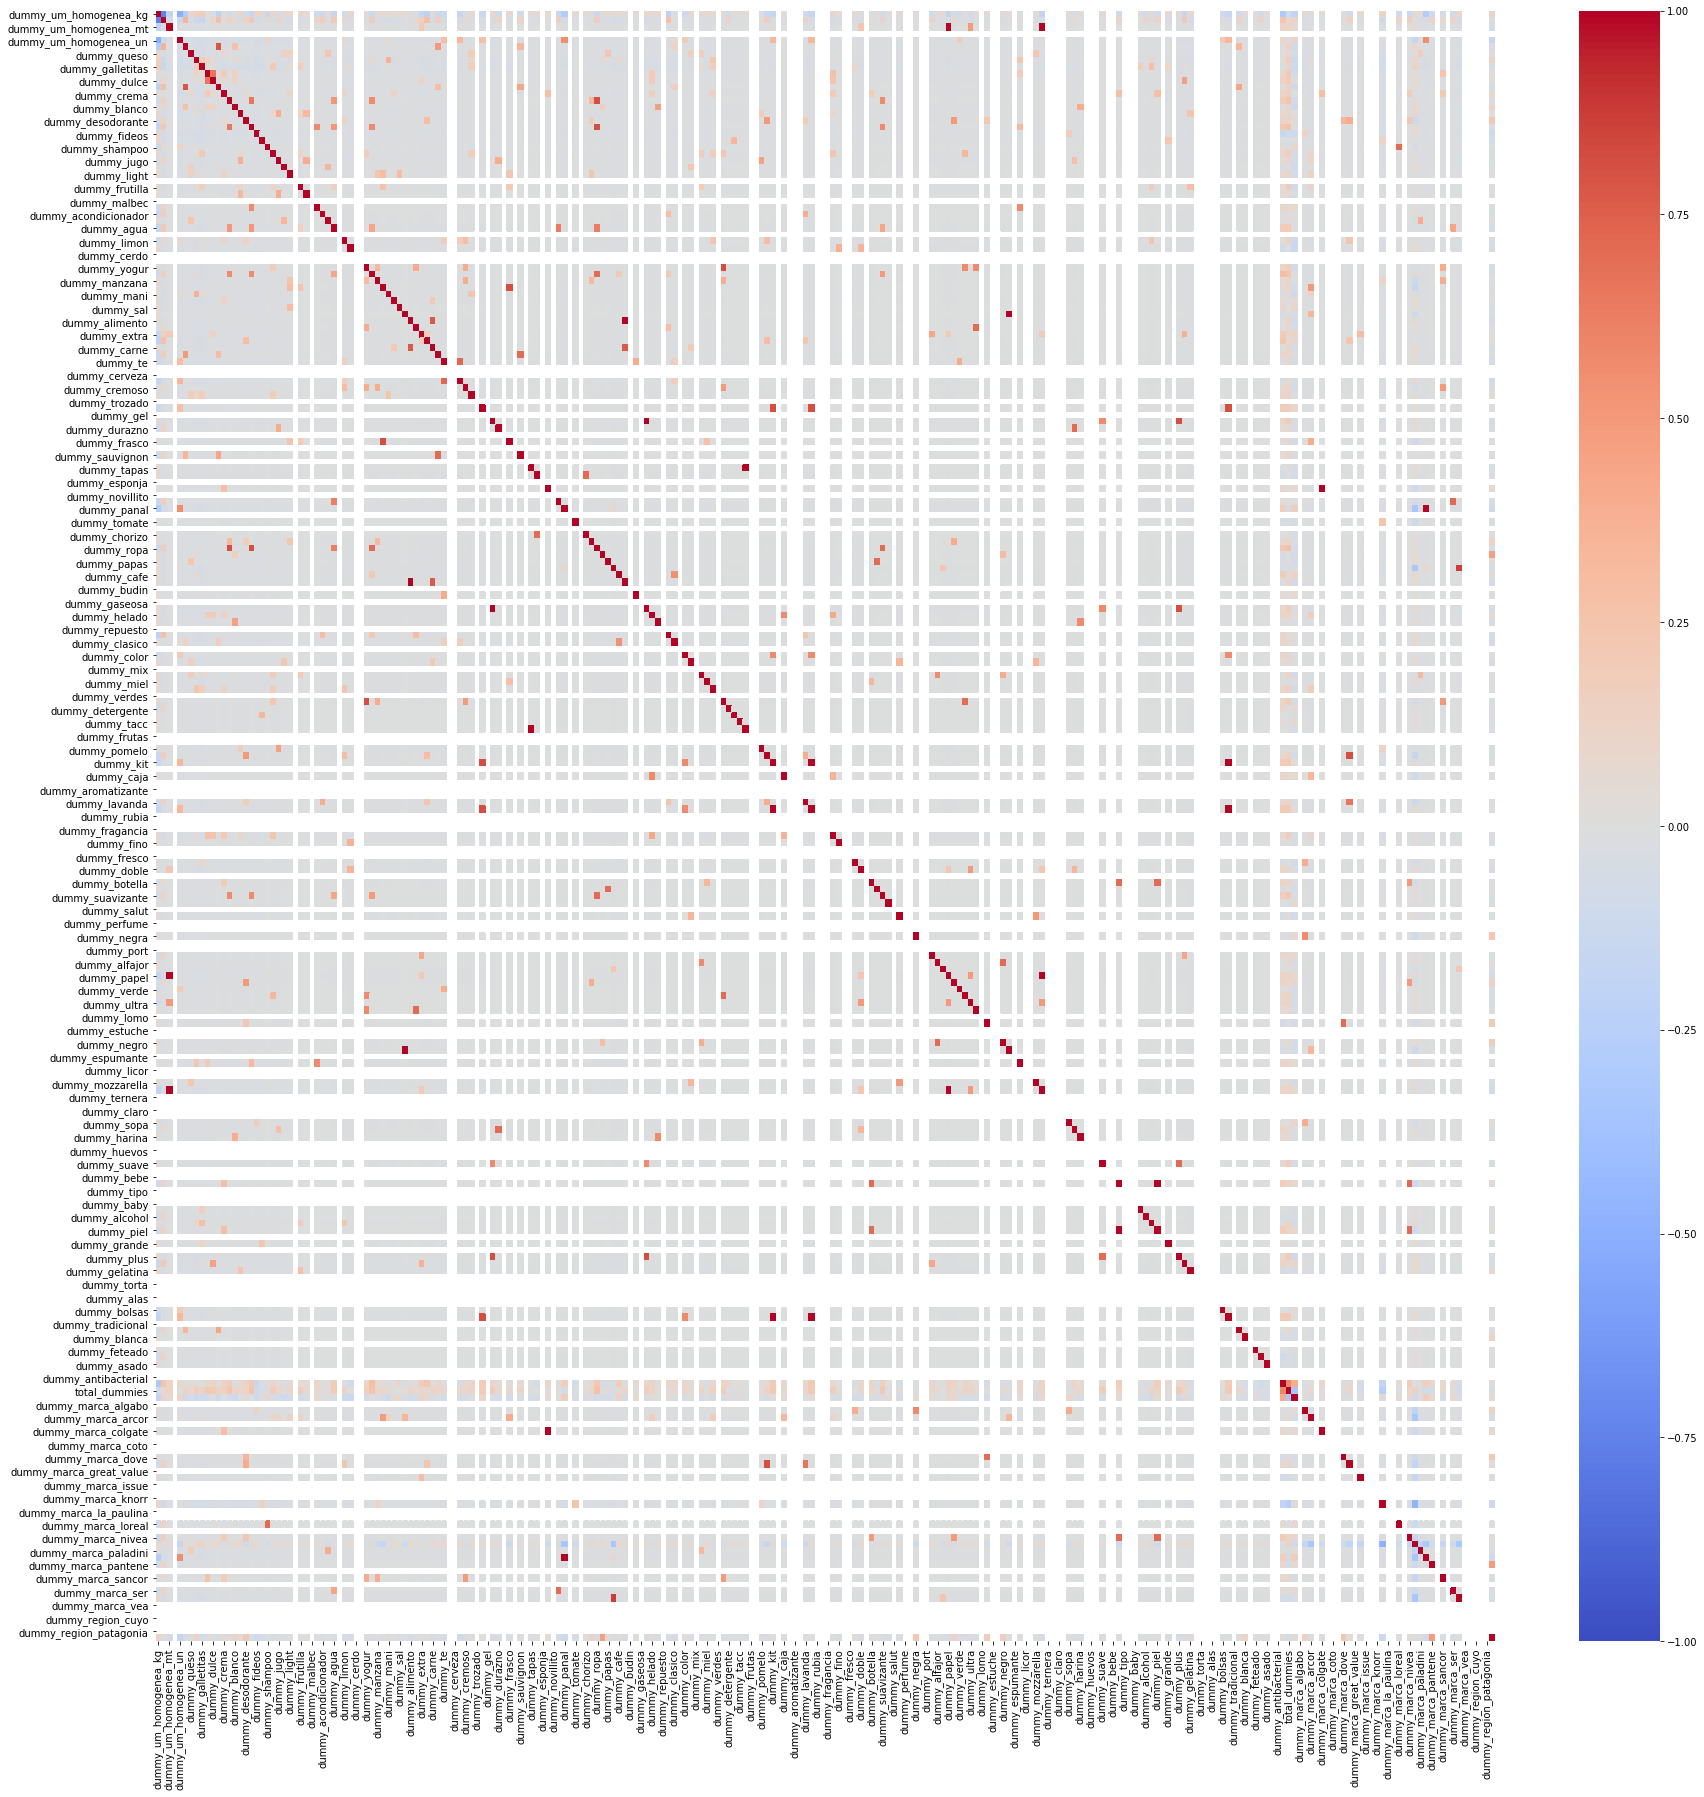

In [23]:
plt.figure(figsize=(30,30))
#sns.heatmap(df.corr('pearson'), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
sns.heatmap(df.corr('pearson'), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

In [24]:
#correlation_target=df.corr('pearson')['precioRelativo'].to_frame()
#correlation_target['abs_corr']=correlation_target['precioRelativo'].abs()
#correlation_target.sort_values(by='abs_corr',ascending=False)

**Nota: eliminamos las siguientes columnas por su correlación observada en el punto anterior**

In [25]:
X=df.copy()

In [26]:
X = X.drop(columns=[
 'dummy_entero',
 'dummy_marca_pampers',
 'dummy_antitranspirante',
 'dummy_marca_glade',
 'dummy_perros',
 'dummy_tono',
 'dummy_region_patagonia',
 'dummy_region_cuyo',
 'dummy_cabernet',
 'dummy_brut',
 'dummy_malbec',
 'dummy_polvo',
 'dummy_oliva',
 'dummy_marca_colgate',
 'dummy_gatos',
 'dummy_gas',
 'dummy_vacio',
 'dummy_saquitos',
 'dummy_region_cuyo',
 'dummy_rubia',
 'dummy_tinto',
 'dummy_verdes',
 'dummy_fritas',
 'dummy_higienico',
 'dummy_tono',
 'dummy_mate',
 'dummy_port'],axis = 1)

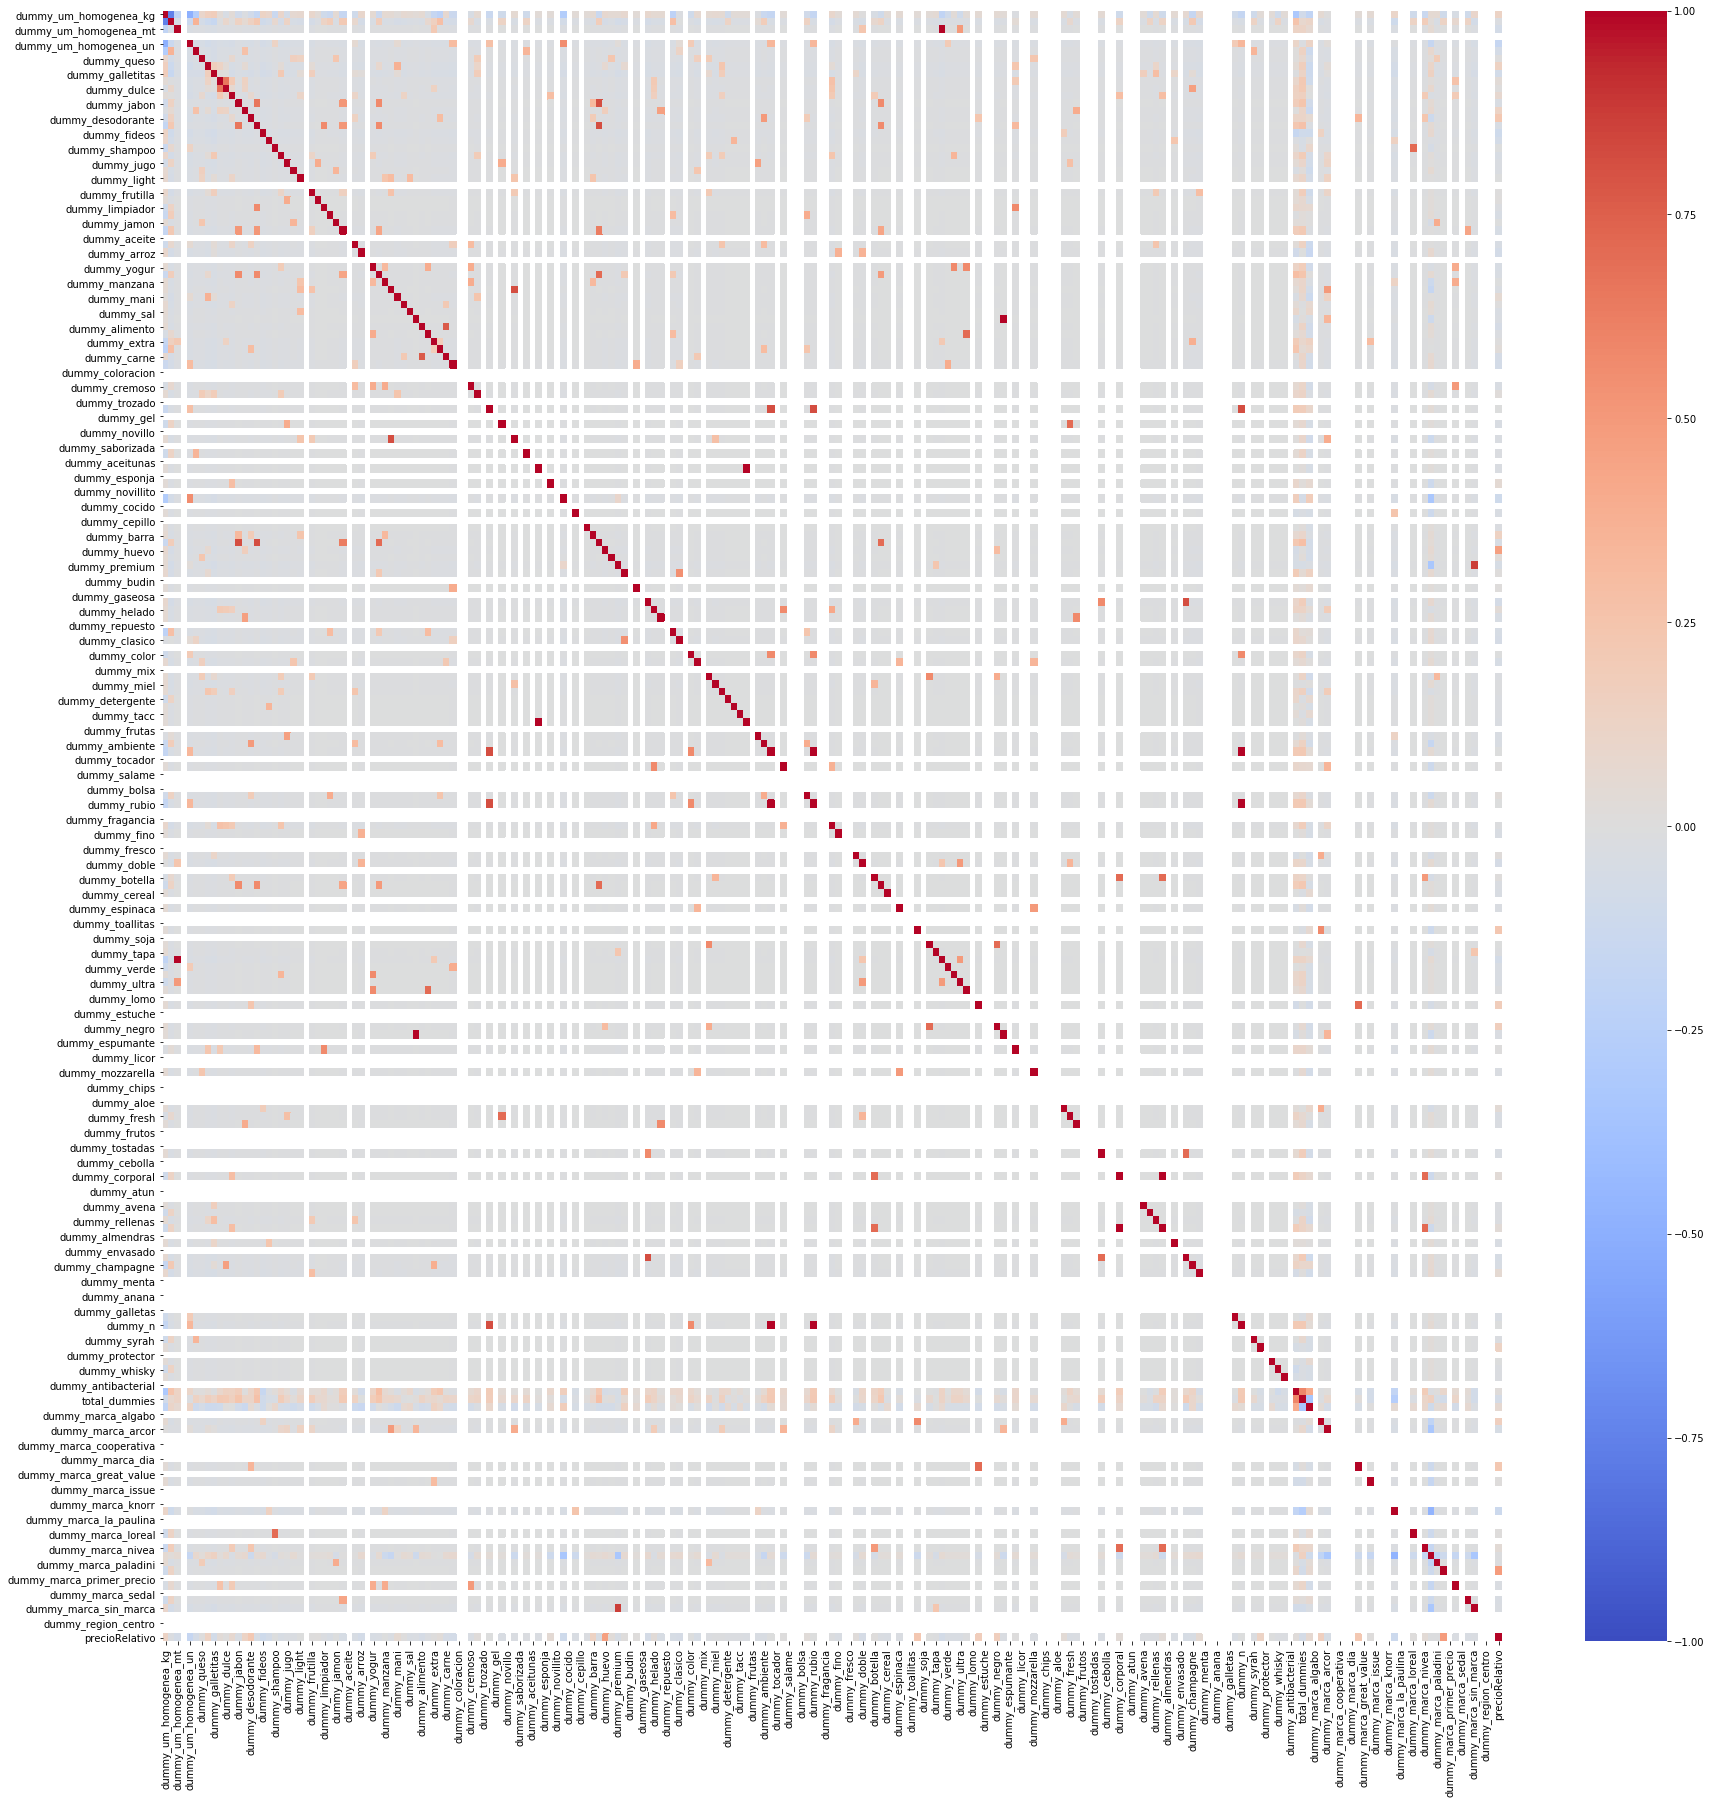

In [27]:
plt.figure(figsize=(30,30))
sns.heatmap(X.corr('pearson'), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

### 4. Multicolinealidad Exacta

¿Existe multicolinealidad en nuestro dataset? ¿Cómo podemos saberlo?

In [28]:
df_sample=df.copy()

In [29]:
from sklearn.linear_model import LinearRegression

def calculate_vif_pandas(df, columnas):
    VIF = {}
    for col in columnas:
        cols = columnas.copy()
        cols.remove(col)
        model = LinearRegression().fit(df[cols].values, df[col].values)
        clave = col
        denom = (1 - model.score(df[cols], df[col]))
        if denom != 0:
            valor = (1 / denom)
            VIF[clave] = valor
    return VIF

In [30]:
df_sample.shape

(300, 244)

In [31]:
lista= list(df_sample.columns.values)

In [32]:
VIF2 = calculate_vif_pandas(df_sample,lista)

In [33]:
df2 = pd.DataFrame([[key, VIF2[key]] for key in VIF2.keys()], columns=['Columnas', 'VIF'])

In [34]:
data_frame = df2.sort_values('VIF',ascending=False)

In [35]:
max_vif = 5

In [36]:

while df2.VIF.max() > max_vif:
    col = df2[df2.VIF == df2.VIF.max()].Columnas.values[0]
    
    print('Elimina columna:', col, 'con VIF', df2.VIF.max())
    lista.remove("{}".format(col))
    VIF2 = calculate_vif_pandas(df_sample, lista)
    df2 = pd.DataFrame([[key, VIF2[key]] for key in VIF2.keys()], columns=['Columnas', 'VIF'])

Elimina columna: palabras_nombre con VIF 10.4513030778592
Elimina columna: precioRelativo con VIF 5.1702131465060575


**Note:** teniendo en cuenta las columnas que detecta con multicolinealidad a continuación procedemos a borrar dichas columnas del dataset X. La columna precioRelativo aun no la eliminaremos dado que luego la asignaremos a Y.

In [37]:
X.drop(columns=['palabras_nombre'],inplace=True)

### 5. Normalización de Atributos


Aplicar al dataset la normalización de atributos que consideren adecuada.

**Nota:** debido a que el dataset X resultante contiene variables dummies y solo tiene el precio del periodo t-1 no se observaron mejoras al normalizar el dataset. Esta es la razón por la que la siguiente celda se deja comentada para ejemplificar los metodos de normalización que se podrian aplicar pero que no tenían influencia en el resultado final para nuestro caso.

In [38]:
# Pueden utilizar los siguientes métodos, por ejemplo:

#min_max_scaler = preprocessing.MinMaxScaler()
#standard_scaler = preprocessing.StandardScaler()

#from sklearn.preprocessing import MinMaxScaler
#X = MinMaxScaler().fit_transform(X)
#X=pd.DataFrame(X)

### 7. Mezca Aleatória y División en Train/Test

Primeramente, deberán mezclar los datos aleatoriamente. Luego, para dividir en Train/Test el dataset, aplicar el split utilizando un 20% de datos para este último.

En este punto, deberán obtener cuatro conjuntos de datos, para ambos datasets: ```X_train```, ```X_test```, ```y_train``` y ```y_test```.

In [39]:
X.shape

(300, 218)

In [40]:
y=df.pop('precioRelativo')

In [41]:
# Para dividir el dataset, utilizar el siguiente módulo:

#_ds_shuff = shuffle(_ds)

# Y luego el módulo:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Notar que X e y son np.arrays. Además, pueden usar el parámetro que incluye train_test_split para mezclar.

In [42]:
X_train.shape, X_test.shape

((240, 218), (60, 218))

## II. Aplicación de Modelos de Regresión

Utilizando los datos de train y test obtenidos, se aplicarán diferentes modelos de regresión para predecir el precio relativo.

### 1. Linear Support Vector Regression ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR))

A continuación se aplicará el modelo

In [43]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score


In [44]:
def svr_results(y_test, X_test, fitted_svr_model):
    
    print("C: {}".format(fitted_svr_model.C))
    print("Epsilon: {}".format(fitted_svr_model.epsilon))
    
    print("Intercept: {:,.3f}".format(fitted_svr_model.intercept_[0]))
    print("Coefficient: {:,.3f}".format(fitted_svr_model.coef_[0]))
    
    mae = mean_absolute_error(y_test, fitted_svr_model.predict(X_test))
    
    print("MAE = {:,.2f}".format(1000*mae))
    
    perc_within_eps = 100*np.sum(y_test - fitted_svr_model.predict(X_test) < eps) / len(y_test)
    print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))
    

In [45]:
# Función para mostrar las métricas
def print_metrics(y_test,y_preds):
    print("MSE: {}".format(mean_squared_error(y_test, y_preds, squared=True)))
    print("RMSE:{}".format(mean_squared_error(y_test, y_preds, squared=False)))
    print("R Square:{}".format(r2_score(y_test, y_preds)))
    print("MAE:{}".format(mean_absolute_error(y_test, y_preds)))
    
#(MSE) – Error cuadrático medio -> Cuanto mayor sea este valor, peor es el modelo. Nunca es negativo, ya que estamos cuadrando los errores de predicción individuales antes de sumarlos, pero sería cero para un modelo perfecto.
#(RMSE) -Error cuadrático medio
#(MAE) -Error absoluto medio
#(R²) – R al cuadrado

In [46]:
# Aplicamos LinearSVR con los parámetros por defecto
eps = 0
c_value = 0.3

svr = LinearSVR(epsilon=eps, C=c_value, fit_intercept=True,max_iter=10000)
svr.fit(X_train, y_train)
svr_results(y_test, X_test, svr)

C: 0.3
Epsilon: 0
Intercept: 0.000
Coefficient: 0.000
MAE = 0.06
Percentage within Epsilon = 91.67%


In [47]:
# Buscamos mejores parámetros
exploring_params = {
    'epsilon': [0.5, 0], # 
    'C': [1, 10, 100],  # Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.
    'max_iter': [150000], #, 5000, 10000],# The maximum number of iterations to be run.
    'tol':[ 1e-5, 1e-4],
    'loss':['epsilon_insensitive','squared_epsilon_insensitive']
    
}

#'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']

#m = LinearSVR(epsilon, C, max_iter, fit_intercept=True)
m = LinearSVR(fit_intercept=True)
n_cross_val = 3  # Seleccionar folds
scoring = 'neg_mean_squared_error' # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
model = GridSearchCV(m, exploring_params, cv=n_cross_val, scoring=scoring)
model.fit(X_train, y_train)
print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")
print("Mejor parámetro: {}".format(model))
print("Puntajes de la grilla:", end="\n\n")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
print("Means = {a} y stds = {b}".format(a=means,b=stds))
print("================================================", end="\n\n")

Mejor conjunto de parámetros:
{'C': 1, 'epsilon': 0, 'loss': 'epsilon_insensitive', 'max_iter': 150000, 'tol': 1e-05}

Mejor parámetro: GridSearchCV(cv=3, estimator=LinearSVR(),
             param_grid={'C': [1, 10, 100], 'epsilon': [0.5, 0],
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'max_iter': [150000], 'tol': [1e-05, 0.0001]},
             scoring='neg_mean_squared_error')
Puntajes de la grilla:

Means = [-9.08721015e-02 -9.08694264e-02 -9.26402623e-02 -9.26429970e-02
 -4.28285158e-11 -1.71783588e-09 -1.10486157e-04 -1.10255231e-04
 -9.08713887e-02 -9.08711015e-02 -9.10556827e-02 -9.10708824e-02
 -5.24022609e-11 -1.75212943e-09 -6.05443824e-06 -6.07327449e-06
 -9.08731611e-02 -9.08677367e-02 -9.08886833e-02 -9.08992413e-02
 -5.80357997e-11 -2.35767489e-09 -1.19028559e-07 -1.22996325e-07] y stds = [2.61711082e-02 2.61934027e-02 2.86373145e-02 2.86323793e-02
 2.41098180e-11 1.1963

In [48]:
#Imprimimos las metricas
print_metrics(y_test,model.predict(X_test))

MSE: 5.958813836687649e-11
RMSE:7.719335357845032e-06
R Square:0.9999999999372741
MAE:2.6881766561340747e-06


In [49]:
print("Score: {score}".format(score = model.score(X_test,model.predict(X_test))))

Score: -0.0


In [50]:
df_resultados_lineal = pd.DataFrame(model.cv_results_)
df_resultados_lineal.sample(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,param_loss,param_max_iter,param_tol,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
18,0.005209,0.007366,0.000000,0.000000,100,0.5,squared_epsilon_insensitive,150000,1e-05,"{'C': 100, 'epsilon': 0.5, 'loss': 'squared_epsilon_insensitive', 'max_iter': 150000, 'tol': 1e-05}",-1.270908e-01,-7.961063e-02,-6.596458e-02,-9.088868e-02,2.619798e-02,19
8,0.005209,0.007367,0.000000,0.000000,10,0.5,epsilon_insensitive,150000,1e-05,"{'C': 10, 'epsilon': 0.5, 'loss': 'epsilon_insensitive', 'max_iter': 150000, 'tol': 1e-05}",-1.270331e-01,-7.961440e-02,-6.596663e-02,-9.087139e-02,2.617020e-02,16
13,0.000000,0.000000,0.015620,0.000002,10,0,epsilon_insensitive,150000,0.0001,"{'C': 10, 'epsilon': 0, 'loss': 'epsilon_insensitive', 'max_iter': 150000, 'tol': 0.0001}",-2.776792e-09,-1.191043e-09,-1.288553e-09,-1.752129e-09,7.256388e-10,5
16,0.000000,0.000000,0.005207,0.007364,100,0.5,epsilon_insensitive,150000,1e-05,"{'C': 100, 'epsilon': 0.5, 'loss': 'epsilon_insensitive', 'max_iter': 150000, 'tol': 1e-05}",-1.270450e-01,-7.960783e-02,-6.596664e-02,-9.087316e-02,2.617661e-02,18
23,0.036462,0.007345,0.000000,0.000000,100,0,squared_epsilon_insensitive,150000,0.0001,"{'C': 100, 'epsilon': 0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 150000, 'tol': 0.0001}",-6.668872e-08,-7.745225e-08,-2.248480e-07,-1.229963e-07,7.215394e-08,8


In [51]:
print("Mejor estimador: {best_estimador}".format(best_estimador = model.best_estimator_ ))

Mejor estimador: LinearSVR(C=1, epsilon=0, max_iter=150000, tol=1e-05)


In [52]:
clfBest=model.best_params_
print("Mejores parámetros: {best_param}".format(best_param = model.best_params_))

Mejores parámetros: {'C': 1, 'epsilon': 0, 'loss': 'epsilon_insensitive', 'max_iter': 150000, 'tol': 1e-05}


In [53]:
#Se ejecuta nuevamente el modelo con los mejores prametros:
svr=LinearSVR(**model.best_params_)
svr.fit(X_train, y_train)
svr_results(y_test, X_test, svr)
y_preds = svr.predict(X_test)

C: 1
Epsilon: 0
Intercept: 0.000
Coefficient: 0.000
MAE = 0.00
Percentage within Epsilon = 41.67%


In [54]:
#Imprimimos las métricas con los mejores parámetros
print_metrics(y_test,svr.predict(X_test))

MSE: 7.149313082364836e-11
RMSE:8.455361069974974e-06
R Square:0.9999999999247422
MAE:3.5797793424174045e-06


### 2. Stochastic Gradient Descent ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor))

In [55]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Always scale the input. The most convenient way is to use a pipeline.


In [56]:
#Primer modelo de prueba
max_iter = 2000
tol = 1e-3
reg = make_pipeline(SGDRegressor(max_iter=max_iter, tol=tol))
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)
print_metrics(y_test,y_predict)

MSE: 0.0006856373409671842
RMSE:0.026184677599068968
R Square:0.9992782586075977
MAE:0.021081058308789712


In [57]:
mae = mean_absolute_error(y_test, y_predict)

In [58]:
#Modelo para buscar los mejores parámetros
model = SGDRegressor()
# Grid search - this will take about 1 minute.
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'learning_rate' : ['invscaling'],
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'fit_intercept' :[True], 
    'power_t' : [0.25],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
     'max_iter': [150000] 
}

clf = GridSearchCV(model, param_grid)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print_metrics(y_test,y_predict)

C:\Users\dyvanoff\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\dyvanoff\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\dyvanoff\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\dyvanoff\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1211: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\dyvanoff\anacon

MSE: 2.0464629855490978e-05
RMSE:0.004523784903760454
R Square:0.9999784577508191
MAE:0.0031871843940687985


In [59]:
print("Score: {score}".format(score = clf.score(X_test,y_predict)))

Score: 1.0


In [60]:
df_resultados_regressor = pd.DataFrame(clf.cv_results_)
df_resultados_regressor.sample(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_intercept,param_learning_rate,param_loss,param_max_iter,param_penalty,param_power_t,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.006249,0.007653,0.003124,0.006249,0.1,True,constant,epsilon_insensitive,150000,l2,0.25,"{'alpha': 0.1, 'fit_intercept': True, 'learning_rate': 'constant', 'loss': 'epsilon_insensitive', 'max_iter': 150000, 'penalty': 'l2', 'power_t': 0...",0.996640,0.997054,0.994859,0.999246,0.993227,0.996205,0.002042,81
127,0.018746,0.006257,0.009373,0.007653,1e-05,True,invscaling,squared_loss,150000,l1,0.25,"{'alpha': 1e-05, 'fit_intercept': True, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 150000, 'penalty': 'l1', 'power_t': 0.25}",0.997206,0.998943,0.998850,0.998748,0.997981,0.998346,0.000664,57
105,0.015620,0.000003,0.009373,0.007653,0.0001,True,invscaling,epsilon_insensitive,150000,l2,0.25,"{'alpha': 0.0001, 'fit_intercept': True, 'learning_rate': 'invscaling', 'loss': 'epsilon_insensitive', 'max_iter': 150000, 'penalty': 'l2', 'power_...",0.998464,0.997465,0.996522,0.998664,0.996322,0.997487,0.000962,73
62,0.012496,0.006248,0.012498,0.006249,0.001,True,constant,epsilon_insensitive,150000,elasticnet,0.25,"{'alpha': 0.001, 'fit_intercept': True, 'learning_rate': 'constant', 'loss': 'epsilon_insensitive', 'max_iter': 150000, 'penalty': 'elasticnet', 'p...",0.998240,0.997225,0.996455,0.999057,0.996678,0.997531,0.000981,71
154,0.009376,0.007656,0.009369,0.007650,1e-06,True,invscaling,squared_loss,150000,l1,0.25,"{'alpha': 1e-06, 'fit_intercept': True, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 150000, 'penalty': 'l1', 'power_t': 0.25}",0.996946,0.999423,0.998831,0.998884,0.998021,0.998421,0.000863,55


In [61]:
print("Mejor estimador: {best_estimador}".format(best_estimador = clf.best_estimator_ ))

Mejor estimador: SGDRegressor(alpha=0.001, learning_rate='constant', loss='huber',
             max_iter=150000, penalty='l1')


In [62]:
print("Mejores parámetros: {best_param}".format(best_param = clf.best_params_))

Mejores parámetros: {'alpha': 0.001, 'fit_intercept': True, 'learning_rate': 'constant', 'loss': 'huber', 'max_iter': 150000, 'penalty': 'l1', 'power_t': 0.25}


### 3. Regression Based on K-Nearest Neighbors ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor))

In [63]:
from sklearn.neighbors import KNeighborsRegressor

In [64]:
n_neighbors = 2
weights = 'uniform'
algorithm = 'auto'

neigh = KNeighborsRegressor(n_neighbors=n_neighbors, weights= weights, algorithm=algorithm)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [65]:
y_predict = neigh.predict(X_test)

In [66]:
print_metrics(y_test,y_predict)

MSE: 0.12952891927007254
RMSE:0.35990126322377997
R Square:0.8636503921760263
MAE:0.2302866555822403


### 4. Gaussian Process Regression ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor))

In [67]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, ExpSineSquared as Exp

In [68]:
np.random.seed(42)

# Instantiate a Gaussian Process model
#kernel = C()*Exp(length_scale=24,periodicity=1)
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) #If None is passed, the kernel “1.0 * RBF(1.0)” is used as default. Note that the kernel’s hyperparameters are optimized during fitting.

gp = GaussianProcessRegressor(kernel=kernel, alpha=1e-4,n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(X_test, return_std=True)

In [69]:
print_metrics(y_test,y_pred)

MSE: 1.1684443856398671e-07
RMSE:0.00034182515788628947
R Square:0.9999998770028078
MAE:0.00019495649843523


In [70]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)

### 5. Prediction Voting Regressor ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor))

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=15)
voting = VotingRegressor([('linear', r1), ('rf', r2)])
voting.fit(X_train, y_train)
y_voting= voting.predict(X_test)
print_metrics(y_test,y_voting)
print('')

#Ajustamos hiperparámetros del voting
params = [{'rf__criterion':['mae','mse']}]
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=voting, param_grid=params, cv=2)
grid.fit(X_train,y_train)
y_grid=grid.predict(X_test)
print_metrics(y_test,y_grid)

MSE: 0.0018390600966355164
RMSE:0.0428842639745107
R Square:0.998064099319642
MAE:0.011895376253130592

MSE: 0.0011550689091902179
RMSE:0.033986304729849905
R Square:0.9987841078759456
MAE:0.009105778643778567


**Metodo Alternativo RandomForrestRegressor**

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
#y_rf_train=rf.predict(X_train)

print('Metricas de test',rf.get_params())
print_metrics(y_test,y_rf)

Metricas de test {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
MSE: 0.0039623959474098715
RMSE:0.06294756506339122
R Square:0.9958289535918528
MAE:0.024659304258911576


**Metodo Alternativo 2 XGBoostRegresor**

In [73]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)
print_metrics(y_test,y_pred)

MSE: 0.6313269355755007
RMSE:0.7945608444766836
R Square:0.33542887133221455
MAE:0.4656983105574338


### 4. Selección del Modelo

#### 4.1. Selección y Descripción de Hipótesis

Describir el problema y la hipótesis del modelo.

Respuesta: Nuestro problema central (el eje de la mentoría) consiste en analizar si existen regiones o provincias que sean más caras que otras en términos de los productos de consumo que habitualmente se comercializan en supermercados.
En esta sección del trabajo, nuestra hipótesis es que el precio relativo de los diferentes bienes puede ser estimado utilizando variables que identifican la región, unidad de medida, palabras frecuentes vinculada al producto, provincia y tipo de establecimiento en que se comercializan, que son las variables que entendemos definen que un producto pueda llegar a ser mas caro en una provincia u otra.
Los datos que disponemos son extracciones periodicas de 5 días de la pagina de Precios Claros, que fueron curados mediante un script propio.
En linea con nuestra hipotesis, y dada la características dicotómica de gran parte de nuestra base de datos y los resultados de modelos obtenidos verificamos que Gaussian Process Regressor, SGDRegressor, VotingRegressor, KNeighborsRegressor y RandomForrestRegresor tienen resultados muy similares. Sin embargo algoritmos como KneighborsRegressor tiene un diferencial por su velocidad para entrenar el modelo.

#### 4.2. Selección de Regularizador

 ¿Utilizarán algún regularizador?¿Cuál?
 
 Respuesta:
para cada algoritmo utilizado para entrenar se utilizarón distintos parámetros que estan reflejados en la sección de cada algoritmo. 

#### 4.3. Selección de Función de Costo

¿Cuál será la función de costo utilizada?

La función de costo utilizada es L1 - MAE-, que corresponde a error absoluto.

#### 4.4. Justificación de las Selecciones

A continuación, se justifican las elecciones previas.

Justifiación de acciones y decisiones realizadas:

-Los resultados obtenidos se hicieron corriendo un sub-conjunto de datos en forma local y luego con todo el dataset en CCAD.

-Eliminación de variables: En la sección de analisis de correlación se decidió eliminar una de las dummies vinculada variables que tenían correlación mayor que 0.5.

-Metodos alternativos: Se probaron metodos alternativos (Random Forest Regressor y XGBOOST) para evaluar alternativas de resultados. En uno de esos métodos (RF) se encontraron mejores resultados que en otros modelos sugeridos.

-Elección del modelo a estimar: La elección del SGDRegressor se origina en que los resultados obtenidos para R-Square y MAE aunque KNN, VotingRegressor (LSVR-RF) y Random Forrest obtienen resultados muy similares. Gaussian Process Regressor obtiene métricas muy buenas pero demora mucho en su ejecución.
 
-La función de costo utlizada: L1, que está asociada a la utilización de MAE, dado que entendemos que los valores que puedan ser considerados outliers no deben ser "sobre-castigados". Esta decisión se basa principalmente en que el nuestro proceso de curación hemos trabajado mucho para eliminar outlier incluso aplicando dos métodos para ello que son Z-score y IQR.

### 5. Selección de Parámetros y Métricas Sobre el Conjunto de Evaluación

Para la selección de hiperparámetros, pueden utilizar GridSearch. Además, deben calcular las métricas solicitadas.

**A continuación seleccionamos parámetros si utilizarámos Random Forrest** 

In [74]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [75]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(n_estimators = 100) 

# Applying Grid Search to find the best model and the best parameters 
from sklearn.model_selection import GridSearchCV

parameters = [{'n_estimators':[200,300,400], 'min_samples_split':[3,9,15],'min_samples_leaf':[3,5,7],'max_features': ['auto', 'sqrt', 'log2']},
             {'n_estimators':[50, 60, 70], 'max_depth': [5, 7, 9], 'min_samples_leaf': [30, 40, 50],'max_features': ['auto', 'sqrt', 'log2']}]

grid_search = GridSearchCV(estimator = model_RF,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5,           
                           n_jobs = -1)      

grid_search = grid_search.fit(X_train, y_train)

best_scoring = grid_search.best_score_
rmse_regress = np.sqrt(np.abs(best_scoring))  # In above, I selected the 'mean_squared_error: mse' scoring. 
print(rmse_regress)

best_parameters = grid_search.best_params_
print("best_parameters:",best_parameters)

0.2300692440921576
best_parameters: {'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 200}


In [76]:
grid_search.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 200}

In [77]:
rfc2=RandomForestRegressor(**grid_search.best_params_)

In [78]:
rfc2.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=3, min_samples_split=3, n_estimators=200)

In [79]:
y_pred=rfc2.predict(X_test)

In [80]:
print_metrics(y_test,y_pred)

MSE: 0.033148532633596364
RMSE:0.18206738487053734
R Square:0.9651059435221016
MAE:0.04280797364137111


## Cálculo de Métricas y Conclusiones

Los resultados finales obtenidos son los siguientes:

|                       | MSE    | RMSE   | R2     | MAE    |
|-----------------------|--------|--------|--------|--------|
| SGDRegressor          | 0,0130 | 0,1140 | 0,9980 | 0,0382 |
| KNeighborsRegressor   | 0,1469 | 0,3833 | 0,9867 | 0,0423 |
| VotingRegressor       | 0,1136 | 0,3371 | 0,9897 | 0,0345 |
| RandomForestRegressor | 0,1920 | 0,4361 | 0,9718 | 0,0545 |


En la evaluación de modelos pudimos verificar que por ejemplo Gaussian Process Regressor consumia muchos recursos e incluso en CCAD con el dataset completo consumia muchisimos recursos y tiempo.
KNN por otra parte fue un algoritmo con una muy buena predicción y que tenia la mayor velocidad de respuesta (menor huella de carbono).
Voting Regressor, Gaussian Process Regressor y RandomForrest tambien fueron algoritmos que dieron buenas métricas. 
XGBoost y Linear SVR no obtuvieron buenas métricas.

## Opcional: Aplicar PCA

In [81]:
df_pca.head()

,dummy_um_homogenea_kg,dummy_um_homogenea_lt,dummy_um_homogenea_mt,dummy_um_homogenea_pack,dummy_um_homogenea_un,dummy_vino,dummy_queso,dummy_chocolate,dummy_galletitas,dummy_leche,dummy_dulce,dummy_tinto,dummy_crema,dummy_jabon,dummy_blanco,dummy_polvo,dummy_desodorante,dummy_liquido,dummy_fideos,dummy_pan,dummy_shampoo,dummy_vainilla,dummy_jugo,dummy_pollo,dummy_light,dummy_bandeja,dummy_frutilla,dummy_naranja,dummy_malbec,dummy_limpiador,dummy_acondicionador,dummy_jamon,dummy_agua,dummy_aceite,dummy_limon,dummy_arroz,dummy_cerdo,dummy_tono,dummy_yogur,dummy_doypack,dummy_manzana,dummy_mermelada,dummy_mani,dummy_lata,dummy_sal,dummy_salsa,dummy_alimento,dummy_natural,dummy_extra,dummy_aerosol,dummy_carne,dummy_cabernet,dummy_te,dummy_coloracion,dummy_cerveza,dummy_saquitos,dummy_cremoso,dummy_sabor,dummy_trozado,dummy_tintura,dummy_gel,dummy_mate,dummy_durazno,dummy_novillo,dummy_frasco,dummy_saborizada,dummy_sauvignon,dummy_aceitunas,dummy_tapas,dummy_vacio,dummy_esponja,dummy_dental,dummy_novillito,dummy_gas,dummy_panal,dummy_cocido,dummy_tomate,dummy_cepillo,dummy_chorizo,dummy_barra,dummy_ropa,dummy_huevo,dummy_papas,dummy_premium,dummy_cafe,dummy_perros,dummy_budin,dummy_especial,dummy_gaseosa,dummy_yerba,dummy_helado,dummy_maiz,dummy_repuesto,dummy_pisos,dummy_clasico,dummy_caramelos,dummy_color,dummy_ravioles,dummy_mix,dummy_mini,dummy_miel,dummy_relleno,dummy_verdes,dummy_entero,dummy_detergente,dummy_salvado,dummy_tacc,dummy_empanadas,dummy_frutas,dummy_oliva,dummy_pomelo,dummy_ambiente,dummy_kit,dummy_tocador,dummy_caja,dummy_salame,dummy_aromatizante,dummy_bolsa,dummy_lavanda,dummy_rubio,dummy_rubia,dummy_vinagre,dummy_fragancia,dummy_postre,dummy_fino,dummy_colonia,dummy_fresco,dummy_coco,dummy_doble,dummy_batata,dummy_botella,dummy_fritas,dummy_suavizante,dummy_cereal,dummy_salut,dummy_espinaca,dummy_perfume,dummy_toallitas,dummy_negra,dummy_soja,dummy_port,dummy_brut,dummy_alfajor,dummy_tapa,dummy_papel,dummy_antitranspirante,dummy_verde,dummy_bebible,dummy_ultra,dummy_azucar,dummy_lomo,dummy_original,dummy_estuche,dummy_bife,dummy_negro,dummy_pizza,dummy_espumante,dummy_bano,dummy_licor,dummy_semillas,dummy_mozzarella,dummy_higienico,dummy_ternera,dummy_chips,dummy_claro,dummy_aloe,dummy_sopa,dummy_fresh,dummy_harina,dummy_frutos,dummy_huevos,dummy_tostadas,dummy_suave,dummy_cebolla,dummy_bebe,dummy_corporal,dummy_tipo,dummy_atun,dummy_baby,dummy_avena,dummy_alcohol,dummy_rellenas,dummy_piel,dummy_almendras,dummy_grande,dummy_envasado,dummy_plus,dummy_champagne,dummy_gelatina,dummy_menta,dummy_torta,dummy_anana,dummy_alas,dummy_galletas,dummy_bolsas,dummy_n,dummy_tradicional,dummy_syrah,dummy_blanca,dummy_protector,dummy_feteado,dummy_whisky,dummy_asado,dummy_gatos,dummy_antibacterial,palabras_nombre,total_dummies,otras_palabras,dummy_marca_algabo,dummy_marca_alicante,dummy_marca_arcor,dummy_marca_carrefour,dummy_marca_colgate,dummy_marca_cooperativa,dummy_marca_coto,dummy_marca_dia,dummy_marca_dove,dummy_marca_glade,dummy_marca_great_value,dummy_marca_ilolay,dummy_marca_issue,dummy_marca_jumbo,dummy_marca_knorr,dummy_marca_la_anonima,dummy_marca_la_paulina,dummy_marca_la_serenisima,dummy_marca_loreal,dummy_marca_marolio,dummy_marca_nivea,dummy_marca_otras,dummy_marca_paladini,dummy_marca_pampers,dummy_marca_pantene,dummy_marca_primer_precio,dummy_marca_sancor,dummy_marca_sedal,dummy_marca_ser,dummy_marca_sin_marca,dummy_marca_vea,dummy_region_centro,dummy_region_cuyo,dummy_region_norte_grande,dummy_region_patagonia,precioRelativo
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [82]:
y = df_pca.pop('precioRelativo')

In [83]:
X = df_pca.copy()

In [84]:
X.shape, y.shape

((300, 243), (300,))

**Obtenemos el nro de componentes que representa el 90% de la varianza**

In [85]:
X_std=X

In [86]:
pd.DataFrame(X_std).head(5)

,dummy_um_homogenea_kg,dummy_um_homogenea_lt,dummy_um_homogenea_mt,dummy_um_homogenea_pack,dummy_um_homogenea_un,dummy_vino,dummy_queso,dummy_chocolate,dummy_galletitas,dummy_leche,dummy_dulce,dummy_tinto,dummy_crema,dummy_jabon,dummy_blanco,dummy_polvo,dummy_desodorante,dummy_liquido,dummy_fideos,dummy_pan,dummy_shampoo,dummy_vainilla,dummy_jugo,dummy_pollo,dummy_light,dummy_bandeja,dummy_frutilla,dummy_naranja,dummy_malbec,dummy_limpiador,dummy_acondicionador,dummy_jamon,dummy_agua,dummy_aceite,dummy_limon,dummy_arroz,dummy_cerdo,dummy_tono,dummy_yogur,dummy_doypack,dummy_manzana,dummy_mermelada,dummy_mani,dummy_lata,dummy_sal,dummy_salsa,dummy_alimento,dummy_natural,dummy_extra,dummy_aerosol,dummy_carne,dummy_cabernet,dummy_te,dummy_coloracion,dummy_cerveza,dummy_saquitos,dummy_cremoso,dummy_sabor,dummy_trozado,dummy_tintura,dummy_gel,dummy_mate,dummy_durazno,dummy_novillo,dummy_frasco,dummy_saborizada,dummy_sauvignon,dummy_aceitunas,dummy_tapas,dummy_vacio,dummy_esponja,dummy_dental,dummy_novillito,dummy_gas,dummy_panal,dummy_cocido,dummy_tomate,dummy_cepillo,dummy_chorizo,dummy_barra,dummy_ropa,dummy_huevo,dummy_papas,dummy_premium,dummy_cafe,dummy_perros,dummy_budin,dummy_especial,dummy_gaseosa,dummy_yerba,dummy_helado,dummy_maiz,dummy_repuesto,dummy_pisos,dummy_clasico,dummy_caramelos,dummy_color,dummy_ravioles,dummy_mix,dummy_mini,dummy_miel,dummy_relleno,dummy_verdes,dummy_entero,dummy_detergente,dummy_salvado,dummy_tacc,dummy_empanadas,dummy_frutas,dummy_oliva,dummy_pomelo,dummy_ambiente,dummy_kit,dummy_tocador,dummy_caja,dummy_salame,dummy_aromatizante,dummy_bolsa,dummy_lavanda,dummy_rubio,dummy_rubia,dummy_vinagre,dummy_fragancia,dummy_postre,dummy_fino,dummy_colonia,dummy_fresco,dummy_coco,dummy_doble,dummy_batata,dummy_botella,dummy_fritas,dummy_suavizante,dummy_cereal,dummy_salut,dummy_espinaca,dummy_perfume,dummy_toallitas,dummy_negra,dummy_soja,dummy_port,dummy_brut,dummy_alfajor,dummy_tapa,dummy_papel,dummy_antitranspirante,dummy_verde,dummy_bebible,dummy_ultra,dummy_azucar,dummy_lomo,dummy_original,dummy_estuche,dummy_bife,dummy_negro,dummy_pizza,dummy_espumante,dummy_bano,dummy_licor,dummy_semillas,dummy_mozzarella,dummy_higienico,dummy_ternera,dummy_chips,dummy_claro,dummy_aloe,dummy_sopa,dummy_fresh,dummy_harina,dummy_frutos,dummy_huevos,dummy_tostadas,dummy_suave,dummy_cebolla,dummy_bebe,dummy_corporal,dummy_tipo,dummy_atun,dummy_baby,dummy_avena,dummy_alcohol,dummy_rellenas,dummy_piel,dummy_almendras,dummy_grande,dummy_envasado,dummy_plus,dummy_champagne,dummy_gelatina,dummy_menta,dummy_torta,dummy_anana,dummy_alas,dummy_galletas,dummy_bolsas,dummy_n,dummy_tradicional,dummy_syrah,dummy_blanca,dummy_protector,dummy_feteado,dummy_whisky,dummy_asado,dummy_gatos,dummy_antibacterial,palabras_nombre,total_dummies,otras_palabras,dummy_marca_algabo,dummy_marca_alicante,dummy_marca_arcor,dummy_marca_carrefour,dummy_marca_colgate,dummy_marca_cooperativa,dummy_marca_coto,dummy_marca_dia,dummy_marca_dove,dummy_marca_glade,dummy_marca_great_value,dummy_marca_ilolay,dummy_marca_issue,dummy_marca_jumbo,dummy_marca_knorr,dummy_marca_la_anonima,dummy_marca_la_paulina,dummy_marca_la_serenisima,dummy_marca_loreal,dummy_marca_marolio,dummy_marca_nivea,dummy_marca_otras,dummy_marca_paladini,dummy_marca_pampers,dummy_marca_pantene,dummy_marca_primer_precio,dummy_marca_sancor,dummy_marca_sedal,dummy_marca_ser,dummy_marca_sin_marca,dummy_marca_vea,dummy_region_centro,dummy_region_cuyo,dummy_region_norte_grande,dummy_region_patagonia
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0

In [87]:
from sklearn.decomposition import PCA
pca = PCA(0.9)

In [88]:
pca.fit(X_std)

PCA(n_components=0.9)

In [89]:
pca.n_components_

37

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20, random_state=42)

In [91]:
train_pca = pca.transform(X_train)
test_pca = pca.transform(X_test)

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
train_pca.shape, test_pca.shape

((240, 37), (60, 37))

In [94]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)

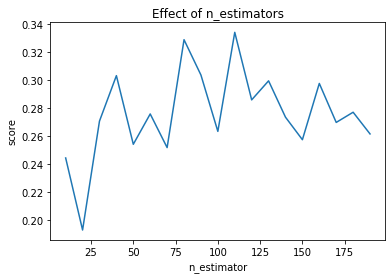

In [95]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

rf=RandomForestRegressor(n_estimators=130, random_state=42)
rf.fit(train_pca, y_train)
y_pred = rf.predict(test_pca)

print('Metricas de test',rf.get_params())
print_metrics(y_test,y_pred)

Metricas de test {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 130, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
MSE: 0.7536949091058754
RMSE:0.8681560396068644
R Square:0.20661728782558075
MAE:0.567911390428797


In [97]:
model_RF_pca = RandomForestRegressor(n_estimators = 100) 

# Applying Grid Search to find the best model and the best parameters 

parameters = [{'n_estimators':[200,300,400], 'min_samples_split':[3,9,15],'min_samples_leaf':[3,5,7]},
             {'n_estimators':[50, 60, 70], 'max_depth': [5, 7, 9], 'min_samples_leaf': [30, 40, 50]}]

grid_search_pca = GridSearchCV(estimator = model_RF_pca,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5,           
                           n_jobs = -1)      

grid_search_pca = grid_search_pca.fit(X_train, y_train)

best_scoring = grid_search_pca.best_score_
rmse_regress = np.sqrt(np.abs(best_scoring))  # In above, I selected the 'mean_squared_error: mse' scoring. 
print(rmse_regress)

best_parameters = grid_search_pca.best_params_
print("best_parameters:",best_parameters)

0.7093143678576241
best_parameters: {'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 300}


In [98]:
grid_search_pca.best_params_

{'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 300}

In [99]:
rfc_pca=RandomForestRegressor(random_state=42,min_samples_leaf=3,min_samples_split=3,n_estimators=400)
rfc_pca.fit(X_train, y_train)
y_pred=rfc_pca.predict(X_test)
print_metrics(y_test,y_pred)

MSE: 0.8149684149660038
RMSE:0.9027560107614924
R Square:0.14211726311211292
MAE:0.5436929196888376


In [100]:
rfc_pca.score(X_test, y_test)

0.14211726311211292

**Exportación dataset para utilizar en la REST API de aplicación**

Por ejemplo si utilizamos VotingRegresor como el modelo que utilizará la REST API para predecir debemos ejecutar lo siguiente:

In [102]:
#Exportamos el modelo entrenado
joblib.dump(grid, 'carobarato.mdl')

['carobarato.mdl']

In [108]:
#Exportamos el dataset de manera que la API pueda utilizarlo para filtrar por nom_provincia y producto_id 
#y obtener todas las columnas dummies de X que se le pasarán al algoritmo para predecir
pickle.dump(X_train,open('X_train.pkl','wb'))